<a href="https://colab.research.google.com/github/tarini-py/Machine-Learning/blob/main/1_linear_regression_insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-3278084539.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'insurance' dataset.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

cat_cols, num_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

In [ ]:
for i in cat_cols:
  print(df[i].value_counts())
  print()

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



<Axes: xlabel='charges', ylabel='Count'>

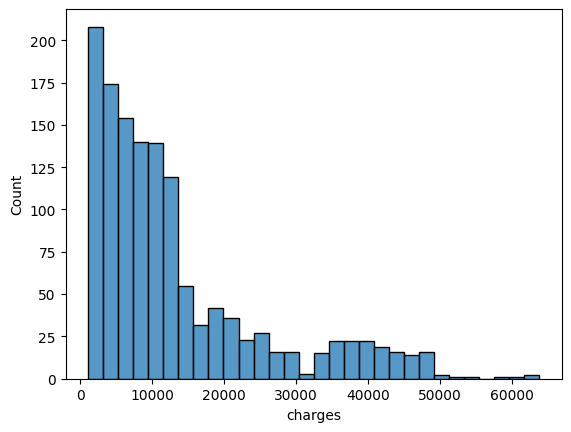

In [ ]:
sns.histplot(df['charges'])

<Axes: xlabel='charges', ylabel='Count'>

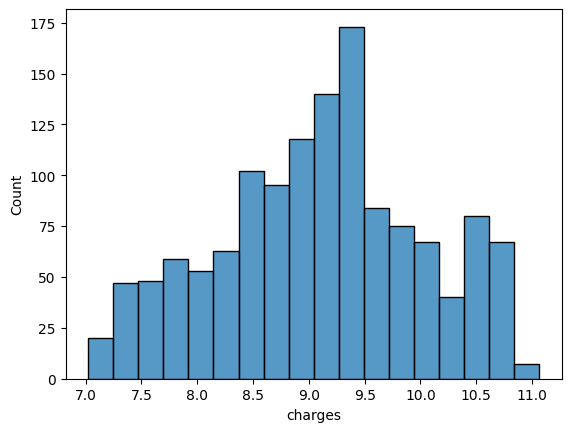

In [ ]:
sns.histplot(np.log(df['charges']))

<Axes: xlabel='age', ylabel='Count'>

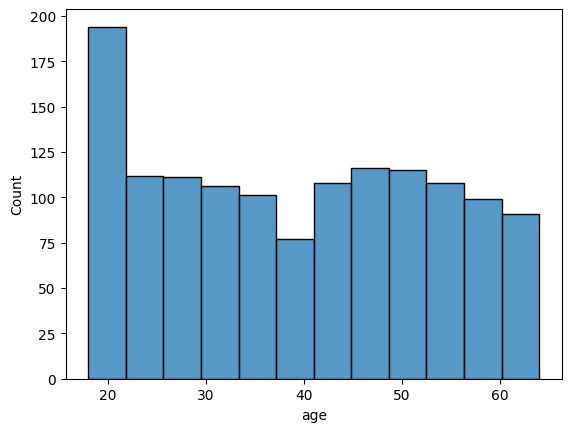

In [ ]:
sns.histplot(df['age'])

<Axes: xlabel='bmi', ylabel='Count'>

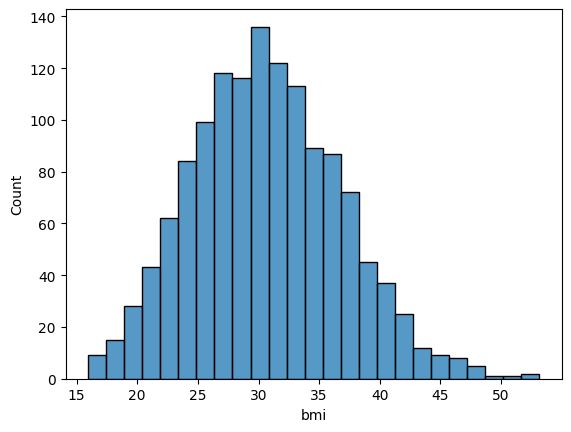

In [ ]:
sns.histplot(df['bmi'])

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
X.shape, y.shape

((1338, 6), (1338,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1204, 6), (1204,), (134, 6), (134,))

In [ ]:
cat_cols, num_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'children'], dtype='object'))

In [ ]:
ohe_cat_cols = cat_cols
num_cols = num_cols.drop(['charges', 'bmi'])

ohe_cat_cols, num_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'children'], dtype='object'))

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
                     ('cat', OneHotEncoder(drop='if_binary', handle_unknown = 'ignore'), ohe_cat_cols),
                     ('num', MinMaxScaler(), num_cols),
                     ('bmi', StandardScaler(), ['bmi'])
    ],
)

model = LinearRegression()

reg = TransformedTargetRegressor(
    regressor = model,
    transformer = MinMaxScaler()
)

pipeline = Pipeline(
    steps = [
             ('preprocess', preprocessor),
             ('reg', reg)
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ohe_cat_cols)
    ],
    remainder = 'passthrough',
    force_int_remainder_cols= False
)

pipeline = Pipeline(
    steps = [
             ('preprocess', preprocessor),
             ('model', LinearRegression())
    ]
)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
764,9095.06825,9182.808613
887,5272.17580,7256.660293
890,29330.98315,37418.931258
1293,9301.89355,9514.014210
259,33750.29180,27136.294608
...,...,...
358,1837.28190,6969.795790
551,3972.92470,5319.240148
778,5934.37980,8925.831449
1127,5836.52040,9252.061955


In [ ]:
pipeline.score(X_test, y_test)

0.7660412422965004

In [ ]:
pipeline.score(X_train, y_train)

0.7491468528033423